In [1]:
# importng pandas and setting some default rows and columns size
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use('fast')

In [3]:
#reading data files
import_ = pd.read_csv("../Data/2018-2010_import.csv")
import_.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.,NaN,AFGHANISTAN TIS,2018


In [4]:
#reading data files
export_ = pd.read_csv("../Data/2018-2010_export.csv")
export_.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.",0.00,AFGHANISTAN TIS,2018
2,4,"DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [5]:
import_['type'] = 'import'
export_['type'] = 'export'

In [6]:
df = pd.concat([import_, export_])

In [7]:
df

,HSCode,Commodity,value,country,year,type
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.",0.00,AFGHANISTAN TIS,2018,import
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018,import
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,268.60,AFGHANISTAN TIS,2018,import
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018,import
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.,NaN,AFGHANISTAN TIS,2018,import
...,...,...,...,...,...,...
137018,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND ACCESSORIES THEREOF.",0.03,ZIMBABWE,2010,export
137019,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.45,ZIMBABWE,2010,export
137020,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2010,export
137021,98,PROJECT GOODS; SOME SPECIAL USES.,0.00,ZIMBABWE,2010,export


In [8]:
df.describe()

,HSCode,value,year
count,230118.000000,202053.000000,230118.000000
mean,52.349482,37.894620,2014.298403
std,27.864025,454.359449,2.646628
min,1.000000,0.000000,2010.000000
25%,29.000000,0.030000,2012.000000
50%,53.000000,0.370000,2014.000000
75%,76.000000,4.140000,2017.000000
max,99.000000,32781.570000,2018.000000


In [9]:
df['value'].sum()

7656721.740000001

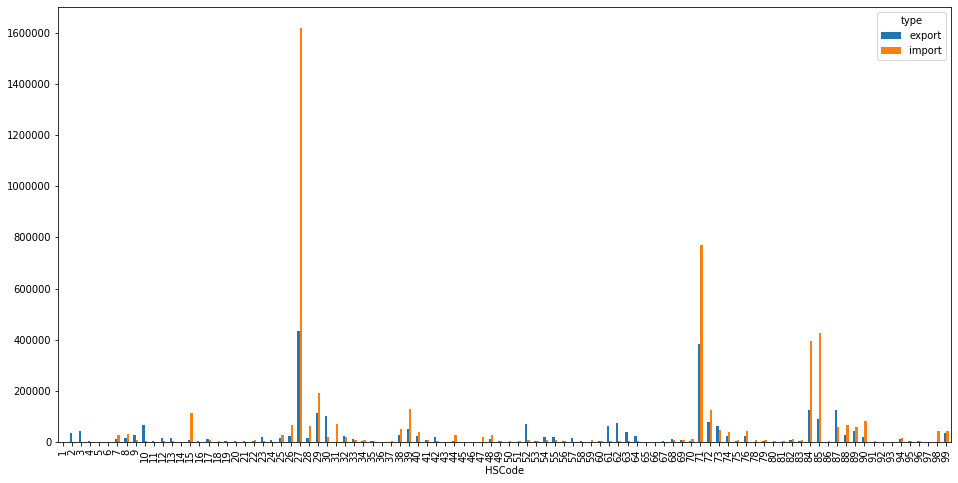

In [10]:
df.groupby(["HSCode",'type']).sum().unstack()['value'].plot.bar(figsize= (16,8))

Text(0.5, 1.0, 'Total Value of Top 15 HSCode we import/export')

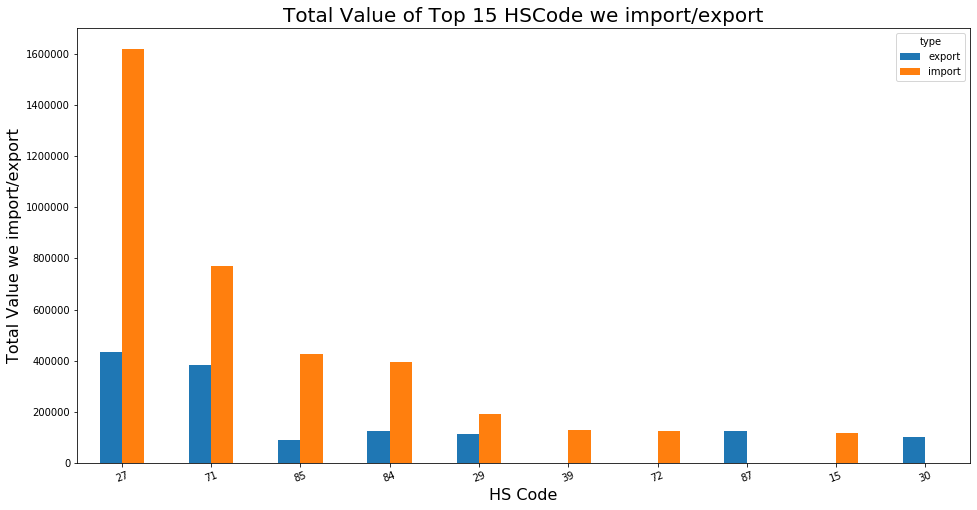

In [11]:
df.groupby(["HSCode","type"]).sum().nlargest(15,['value']).unstack()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value we import/export', fontsize = 16)
plt.xlabel('HS Code', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total Value of Top 15 HSCode we import/export', fontsize = 20)

In [15]:
df.groupby(["HSCode","type"]).sum().nlargest(15,['value']).unstack()['value']

,,value,year
HSCode,type,,
27,import,1618556.68,2864886
71,import,770826.15,2933456
27,export,434594.81,3093623
85,import,427570.66,4379928
84,import,393021.90,4210617
71,export,383341.86,3635238
29,import,192168.00,2707631
39,import,129127.42,3759390
72,import,126034.55,3678637


Text(0.5, 1.0, 'Total value we import Country Wise For HS Code 27')

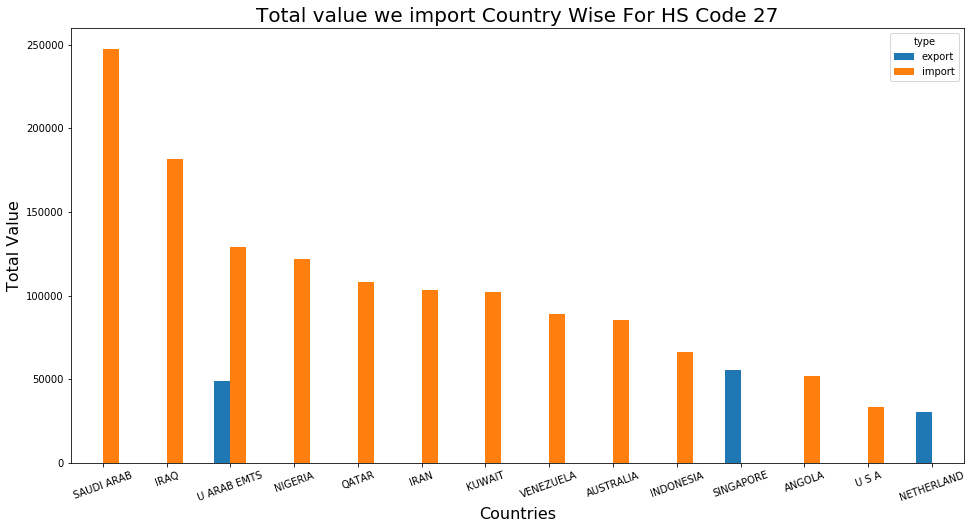

In [13]:
df[df['HSCode']==27].groupby(['country','type']).sum().nlargest(15, ['value']).unstack()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value we import Country Wise For HS Code 27', fontsize = 20)

Text(0.5, 1.0, 'Total value india import/export every year')

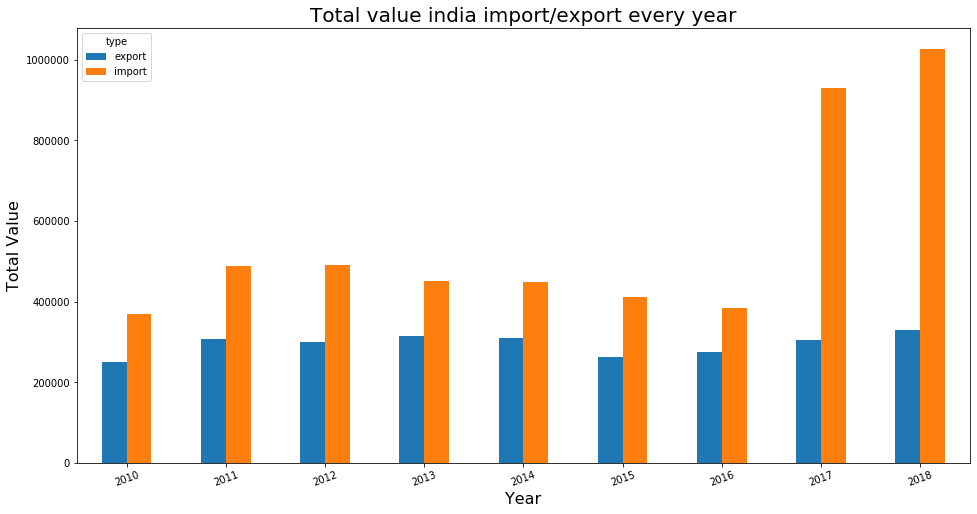

In [14]:
# year wise import plot
df.groupby(['year','type']).sum().unstack()['value'].plot.bar(figsize= (16,8))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value india import/export every year', fontsize = 20)

Text(0.5, 1.0, 'Total value India import/export every year from China')

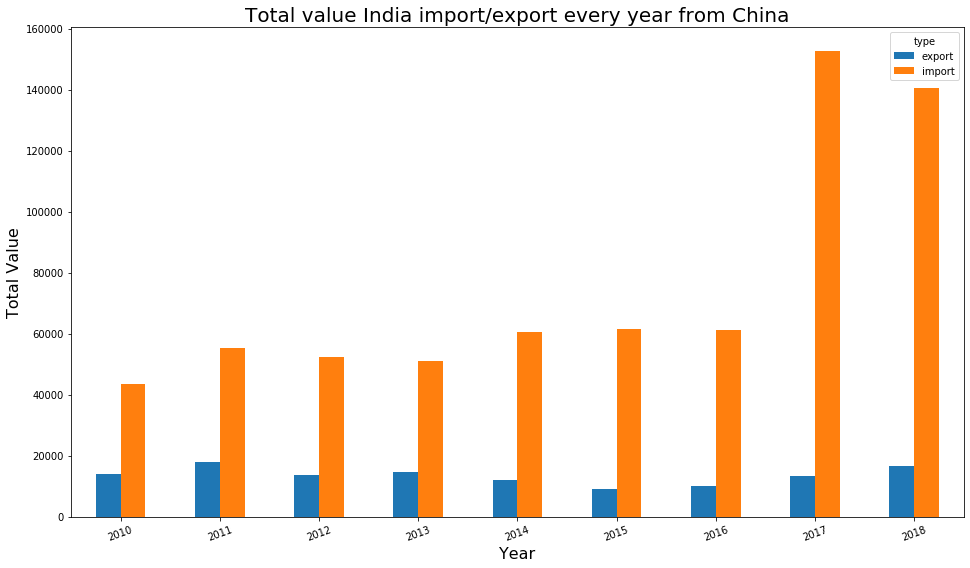

In [17]:
df[df['country'] == 'CHINA P RP'].groupby(['year','type']).sum().unstack()['value'].plot.bar(figsize = (16,9))
# df[df['country'] == 'CHINA P RP'].groupby(['year']).sum()['value'].plot(figsize = (16,9))
plt.ylabel('Total Value', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(rotation=20)
plt.title('Total value India import/export every year from China', fontsize = 20)

In [18]:
df.to_csv('../Data/trade.csv')